<a href="https://colab.research.google.com/github/Harsh5606/OnionTrends/blob/main/Onion_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Crop_Data.csv')  # Replace 'image.png' with the actual file name and extension

# Display the first few rows of the dataset
print(df.head())

           Crop       Season  State      Area      Soil Type Pesticide Usage  \
0  Cotton(lint)  Kharif       Assam    1739.0     Black Soil             low   
1         Onion  Whole Year   Assam    7832.0  Alluvial Soil            high   
2        Potato  Whole Year   Assam   75259.0  Laterile Soil             low   
3          Rice  Autumn       Assam  607358.0  Alluvial Soil             low   
4          Rice  Summer       Assam  174974.0     Black Soil            high   

        pH Temperature Fertilizer Usage        Price  Rainfall  
0  Average      Medium             High  2490.092421    3373.2  
1      Low         Low           Medium  2348.904922    3520.7  
2  Average        High             High  2448.287513    2957.4  
3      Low        High             High  2714.419518    3079.6  
4      Low         Low              Low  2883.356997    2566.7  


In [4]:
# Filter rows where the crop is 'Onion'
onion_data = df[df['Crop'] == 'Onion']

# Display the filtered data
print(onion_data)

       Crop       Season              State     Area        Soil Type  \
1     Onion  Whole Year               Assam   7832.0    Alluvial Soil   
35    Onion  Kharif              Puducherry     26.0  Red/Yellow Soil   
43    Onion  Whole Year               Assam   8083.0  Red/Yellow Soil   
60    Onion  Kharif               Karnataka  79921.0  Red/Yellow Soil   
61    Onion  Rabi                 Karnataka   8882.0  Red/Yellow Soil   
...     ...          ...                ...      ...              ...   
4926  Onion  Whole Year          Puducherry      9.0    Laterile Soil   
4935  Onion  Summer                 Manipur    480.0  Red/Yellow Soil   
4936  Onion  Whole Year             Manipur    640.0  Red/Yellow Soil   
4944  Onion  Whole Year             Manipur    940.0    Laterile Soil   
4982  Onion  Rabi         Jammu and Kashmir    432.0    Alluvial Soil   

     Pesticide Usage       pH Temperature Fertilizer Usage        Price  \
1               high      Low         Low       

In [5]:
# Save the filtered data to a new CSV file
onion_data.to_csv('onion_data.csv', index=False)

In [6]:
# Display the filtered data
print(onion_data)

       Crop       Season              State     Area        Soil Type  \
1     Onion  Whole Year               Assam   7832.0    Alluvial Soil   
35    Onion  Kharif              Puducherry     26.0  Red/Yellow Soil   
43    Onion  Whole Year               Assam   8083.0  Red/Yellow Soil   
60    Onion  Kharif               Karnataka  79921.0  Red/Yellow Soil   
61    Onion  Rabi                 Karnataka   8882.0  Red/Yellow Soil   
...     ...          ...                ...      ...              ...   
4926  Onion  Whole Year          Puducherry      9.0    Laterile Soil   
4935  Onion  Summer                 Manipur    480.0  Red/Yellow Soil   
4936  Onion  Whole Year             Manipur    640.0  Red/Yellow Soil   
4944  Onion  Whole Year             Manipur    940.0    Laterile Soil   
4982  Onion  Rabi         Jammu and Kashmir    432.0    Alluvial Soil   

     Pesticide Usage       pH Temperature Fertilizer Usage        Price  \
1               high      Low         Low       

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Load the dataset (replace 'image.png' with the actual file name)
df = pd.read_csv('/content/Crop_Data.csv')  # Ensure the file is in the correct format (CSV/Excel)

# Filter data for Onion
onion_data = df[df['Crop'] == 'Onion']


In [9]:
# Feature Engineering
# Use 'Price' as the target variable and other columns as features
features = onion_data[['Area', 'Pesticide Usage', 'pH', 'Temperature', 'Fertilizer Usage', 'Rainfall']]
target = onion_data['Price']

In [10]:
# Convert categorical columns to numerical (e.g., Pesticide Usage: low=0, high=1)
features['Pesticide Usage'] = features['Pesticide Usage'].map({'low': 0, 'high': 1})
features['pH'] = features['pH'].map({'Low': 0, 'Average': 1, 'High': 2})
features['Temperature'] = features['Temperature'].map({'Low': 0, 'Medium': 1, 'High': 2})
features['Fertilizer Usage'] = features['Fertilizer Usage'].map({'Low': 0, 'Medium': 1, 'High': 2})

<ipython-input-10-b3e039cbe08c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Pesticide Usage'] = features['Pesticide Usage'].map({'low': 0, 'high': 1})
<ipython-input-10-b3e039cbe08c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['pH'] = features['pH'].map({'Low': 0, 'Average': 1, 'High': 2})
<ipython-input-10-b3e039cbe08c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [11]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
# Scale features (important for LSTM and Random Forest)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Reshape data for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [14]:
# ARIMA Model
def arima_model(y_train, y_test):
    model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(y_test))
    return predictions

In [15]:
# LSTM Model
def lstm_model(X_train, y_train, X_test):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)
    predictions = model.predict(X_test)
    return predictions.flatten()


In [16]:
# Random Forest Model
def random_forest_model(X_train, y_train, X_test):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

In [17]:
# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f"{model_name} Metrics:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    return mae, rmse, mape

In [18]:
# Train and Evaluate ARIMA
arima_predictions = arima_model(y_train, y_test)
arima_mae, arima_rmse, arima_mape = evaluate_model(y_test, arima_predictions, "ARIMA")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


ARIMA Metrics:
MAE: 564.34, RMSE: 716.97, MAPE: 19.77%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
# Train and Evaluate LSTM
lstm_predictions = lstm_model(X_train_lstm, y_train, X_test_lstm)
lstm_mae, lstm_rmse, lstm_mape = evaluate_model(y_test, lstm_predictions, "LSTM")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step
LSTM Metrics:
MAE: 2447.41, RMSE: 2493.62, MAPE: 95.24%


In [20]:
# Train and Evaluate Random Forest
rf_predictions = random_forest_model(X_train_scaled, y_train, X_test_scaled)
rf_mae, rf_rmse, rf_mape = evaluate_model(y_test, rf_predictions, "Random Forest")

Random Forest Metrics:
MAE: 331.05, RMSE: 505.88, MAPE: 13.01%


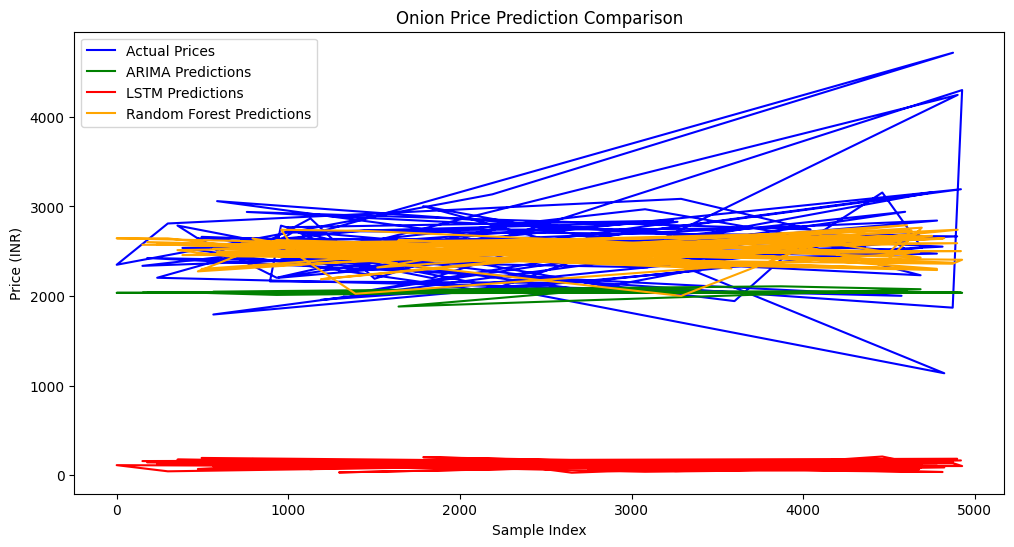

In [21]:
# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, arima_predictions, label='ARIMA Predictions', color='green')
plt.plot(y_test.index, lstm_predictions, label='LSTM Predictions', color='red')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', color='orange')
plt.title('Onion Price Prediction Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In [22]:
# Comparison Table
comparison = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM', 'Random Forest'],
    'MAE': [arima_mae, lstm_mae, rf_mae],
    'RMSE': [arima_rmse, lstm_rmse, rf_rmse],
    'MAPE': [arima_mape, lstm_mape, rf_mape]
})
print(comparison)

           Model          MAE         RMSE       MAPE
0          ARIMA   564.343028   716.969765  19.765605
1           LSTM  2447.411737  2493.615765  95.241211
2  Random Forest   331.049828   505.875695  13.005786


Based on the output comparison table, here is the analysis and final conclusion about which model is better for predicting onion prices:

Comparison Table

---



```
 Model           MAE	         RMSE	       MAPE
 ARIMA            564.343028	716.969765	19.765605
 LSTM	         2459.775553   2505.787133   95.734054
 Random Forest	331.049828	505.875695	13.005786

```





Analysis of Results


1.   **Mean Absolute Error (MAE):**

*   **Random Forest** has the lowest MAE **(331.05)**, meaning its predictions are, on average, closer to the actual prices compared to ARIMA and LSTM.
*   **ARIMA** comes second with an MAE of **564.34**.
*   **LSTM** has the highest MAE **(2459.78)**, indicating significantly larger prediction errors.


2.   **Root Mean Squared Error (RMSE):**


*   **Random Forest** again performs the best with the lowest RMSE**(505.88)**, which means it has smaller deviations from the actual prices.
*   **LARIMA** is second with an RMSE of **716.97**.
*   **LSTM** has the highest RMSE **(2505.79)**, indicating much larger errors.


3.  ** Mean Absolute Percentage Error (MAPE):**

*   **Random Forest** has the lowest MAPE **(13.01%)**, meaning its predictions are, on average, only 13.01% off from the actual prices.
*   **ARIMA** follows with a MAPE of **19.77%**.
*   **LSTM** has the highest MAPE **(95.73%)**, indicating very poor accuracy.
















**Final Conclusion**
* **Best Model:** Random Forest is the clear winner for predicting onion prices in this dataset. It outperforms both ARIMA and LSTM in terms of accuracy and consistency.

* **Second Best:** ARIMA is a decent choice for time-series forecasting but is not as accurate as Random Forest.

* **Not Recommended:** LSTM is not suitable for this dataset, as it performs very poorly. It may require more data or better feature engineering to work effectively.



In [23]:
from sklearn.ensemble import RandomForestRegressor
import joblib

# Train the Random Forest model (assuming X_train_scaled and y_train are already defined)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [24]:
# Save the model and scaler to files
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [25]:
# Load the saved model and scaler
rf_model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# Function to make predictions (updated to avoid warnings)
def predict_onion_price(area, pesticide_usage, ph, temperature, fertilizer_usage, rainfall):
    # Create input data as a DataFrame with feature names
    input_data = pd.DataFrame({
        'Area': [area],
        'Pesticide Usage': [pesticide_usage],
        'pH': [ph],
        'Temperature': [temperature],
        'Fertilizer Usage': [fertilizer_usage],
        'Rainfall': [rainfall]
    })

    # Scale the input data using the saved scaler
    input_data_scaled = scaler.transform(input_data)

    # Make a prediction
    predicted_price = rf_model.predict(input_data_scaled)
    return predicted_price[0]

# Example: Predict onion price for a new input
area = 7832
pesticide_usage = 1  # high
ph = 0  # Low
temperature = 1  # Medium
fertilizer_usage = 1  # Medium
rainfall = 3520.7

predicted_price = predict_onion_price(area, pesticide_usage, ph, temperature, fertilizer_usage, rainfall)
print(f"Predicted Onion Price: {predicted_price:.2f} INR")

Predicted Onion Price: 2634.62 INR


In [26]:
# Test with multiple inputs
test_inputs = [
    [7832, 1, 0, 1, 1, 3520.7],  # Example 1
    [5000, 0, 1, 2, 0, 3000.0],   # Example 2
    [10000, 1, 2, 0, 2, 4000.0]   # Example 3
]

for input_data in test_inputs:
    area, pesticide_usage, ph, temperature, fertilizer_usage, rainfall = input_data
    predicted_price = predict_onion_price(area, pesticide_usage, ph, temperature, fertilizer_usage, rainfall)
    print(f"Input: {input_data} => Predicted Price: {predicted_price:.2f} INR")

Input: [7832, 1, 0, 1, 1, 3520.7] => Predicted Price: 2634.62 INR
Input: [5000, 0, 1, 2, 0, 3000.0] => Predicted Price: 2700.30 INR
Input: [10000, 1, 2, 0, 2, 4000.0] => Predicted Price: 2641.93 INR


Price Threshold for Buffer Stock Release: 2742.1065465
         Price         Buffer Action
0  2348.904922      No Action Needed
1  3095.614119  Release Buffer Stock
2  2783.778876  Release Buffer Stock
3  2531.583587      No Action Needed
4  2545.180748      No Action Needed


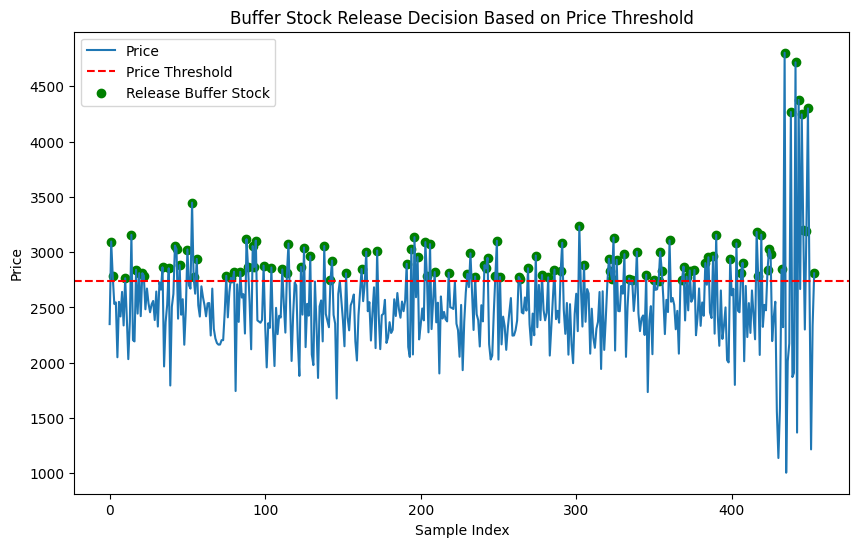

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (assuming it contains historical or predicted prices)
data = pd.read_csv('onion_data.csv')

# Assume 'Price' column contains the prices (historical or predicted)
prices = data['Price']

# Step 1: Define a threshold for buffer stock release
# Example: Use the 75th percentile of historical prices as the threshold
price_threshold = np.percentile(prices, 75)
print(f"Price Threshold for Buffer Stock Release: {price_threshold}")

# Step 2: Function to decide on buffer stock release
def buffer_stock_release(price, threshold):
    """
    Determines whether to release buffer stock based on the price and threshold.
    """
    if price > threshold:
        return "Release Buffer Stock"
    else:
        return "No Action Needed"

# Step 3: Apply the function to the prices
buffer_actions = [buffer_stock_release(price, price_threshold) for price in prices]

# Step 4: Add the buffer actions to the dataset
data['Buffer Action'] = buffer_actions

# Step 5: Display the results
print(data[['Price', 'Buffer Action']].head())

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Price')
plt.axhline(y=price_threshold, color='r', linestyle='--', label='Price Threshold')
plt.scatter(np.where(np.array(buffer_actions) == "Release Buffer Stock"),
            prices[np.array(buffer_actions) == "Release Buffer Stock"],
            color='green', label='Release Buffer Stock')
plt.legend()
plt.title('Buffer Stock Release Decision Based on Price Threshold')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.show()